In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [5]:
# groupby() without as_index
first_even = example_df.groupby('even').first()
print first_even
#print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame

       above_three  value
even                     
False        False      1
True         False      2


In [6]:
# groupby() with as_index=False

first_even = example_df.groupby('even', as_index=False).first()
print first_even
print first_even['even'] # Now 'even' is still a column in the DataFrame

    even  above_three  value
0  False        False      1
1   True        False      2
0    False
1     True
Name: even, dtype: bool


In [7]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!

In [8]:
subway_df.head(3)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [9]:
list(subway_df)

['UNIT',
 'DATEn',
 'TIMEn',
 'ENTRIESn',
 'EXITSn',
 'ENTRIESn_hourly',
 'EXITSn_hourly',
 'datetime',
 'hour',
 'day_week',
 'weekday',
 'station',
 'latitude',
 'longitude',
 'conds',
 'fog',
 'precipi',
 'pressurei',
 'rain',
 'tempi',
 'wspdi',
 'meanprecipi',
 'meanpressurei',
 'meantempi',
 'meanwspdi',
 'weather_lat',
 'weather_lon']

In [10]:
subway_df_station = subway_df.groupby('station')

In [11]:
# get latitude and longitude of each station
subway_df_station_location = subway_df.groupby('station').first()[['latitude', 'longitude']]

In [12]:
# check to see if its what we want
subway_df_station_location.head(3)

,latitude,longitude
station,,
1 AVE,40.730901,-73.981719
103 ST-CORONA,40.749858,-73.862672
104 ST,40.695184,-73.844326


In [13]:
subway_df_station_location.reset_index().head(3)

,station,latitude,longitude
0,1 AVE,40.730901,-73.981719
1,103 ST-CORONA,40.749858,-73.862672
2,104 ST,40.695184,-73.844326


In [14]:
# get total entries per station
subway_df_station_entries = subway_df.groupby('station').sum()['ENTRIESn_hourly']

In [15]:
# check to see if its what we want
subway_df_station_entries.head(3)

station
1 AVE            587490.0
103 ST-CORONA    472827.0
104 ST            64965.0
Name: ENTRIESn_hourly, dtype: float64

In [16]:
# create a new DataFrame with only the information we want
subway_df_station_new = pd.concat([subway_df_station_location, subway_df_station_entries], axis=1)

In [17]:
subway_df_station_new.head(2)

,latitude,longitude,ENTRIESn_hourly
station,,,
1 AVE,40.730901,-73.981719,587490.0
103 ST-CORONA,40.749858,-73.862672,472827.0


In [18]:
subway_df_station_new.rename(columns={'ENTRIESn_hourly':'entries'}, inplace=True)
subway_df_station_new.head(2)

,latitude,longitude,entries
station,,,
1 AVE,40.730901,-73.981719,587490.0
103 ST-CORONA,40.749858,-73.862672,472827.0


Populating the interactive namespace from numpy and matplotlib


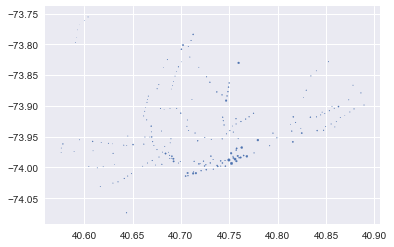

In [25]:
%pylab inline
plt.scatter(subway_df_station_new['latitude'], subway_df_station_new['longitude'],
           s = subway_df_station_new['entries']/subway_df_station_new['entries'].std())
plt.show()